<a href="https://colab.research.google.com/github/Aritra-ds/Prototype-of-Cancerous-Cell-Classification/blob/main/Prototype_of_Cancerous_Cell_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cancer Label Assignment Successful.

Cancer Label Distribution:
 Cancer_Label
1    19
0    18
Name: count, dtype: int64


<ipython-input-2-6b57ecf69f5b>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=samples_df['Cancer_Label'], palette='coolwarm')


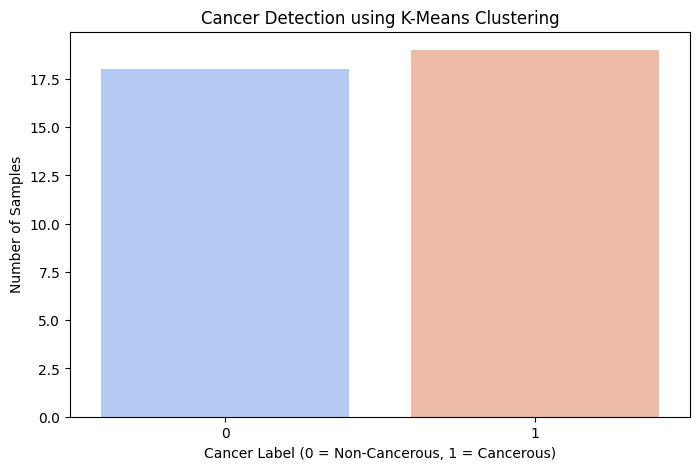

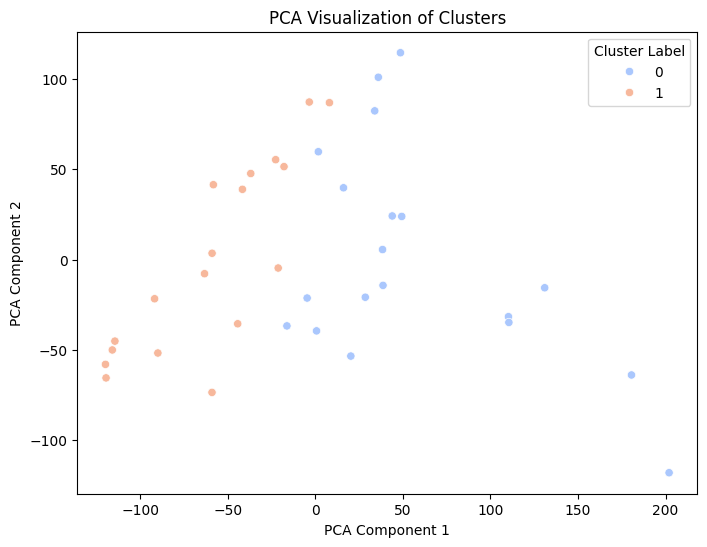

Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



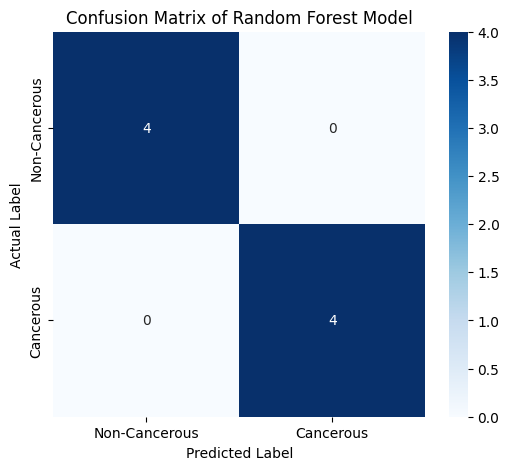

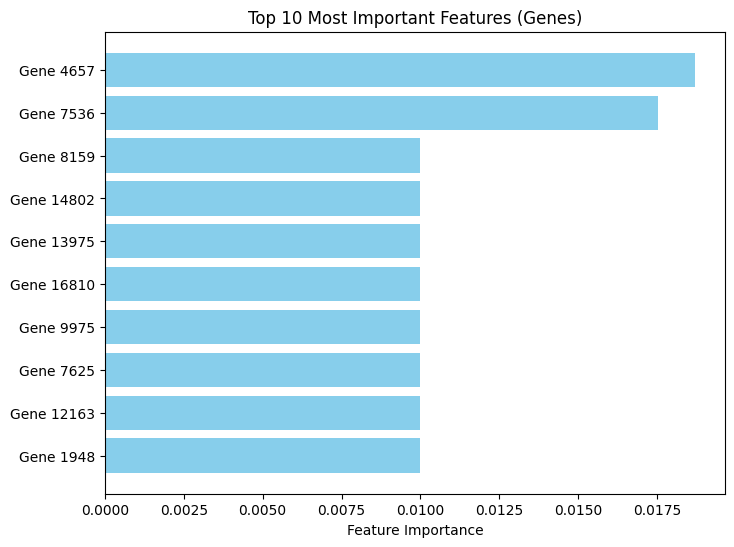

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4138 - loss: 0.8134 - val_accuracy: 0.6250 - val_loss: 3.5354
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9655 - loss: 0.0430 - val_accuracy: 0.6250 - val_loss: 3.5622
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 0.5000 - val_loss: 5.4572
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9655 - loss: 0.1524 - val_accuracy: 0.6250 - val_loss: 7.2391
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - accuracy: 0.9310 - loss: 1.1922 - val_accuracy: 0.6250 - val_loss: 9.0775
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 1.0000 - loss: 2.7264e-05 - val_accuracy: 0.5000 - val_loss: 11.8953
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8966 - loss: 0.8462 - val_accuracy: 0.6250 - val_loss: 12.9680
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9655 - loss: 0.5478 - val_accuracy: 0.6250 - val_loss: 12.1772
Epo

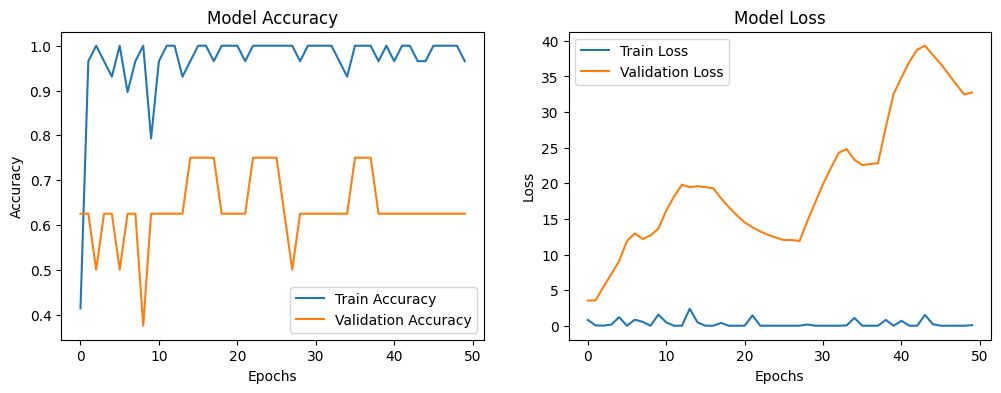

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


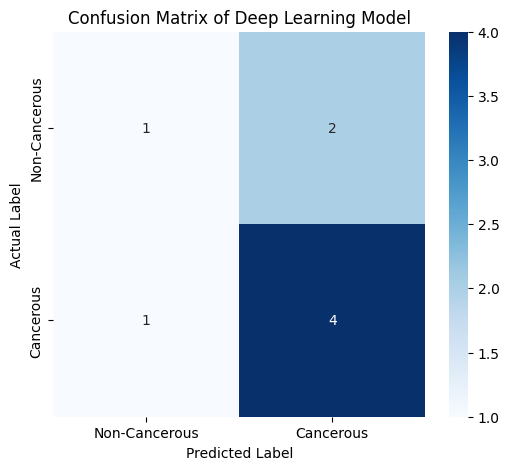

KeyError: 'gene_biotype'

<Figure size 1200x500 with 0 Axes>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load Dataset
file_path = "GSE284400_EOC.expression.TPM.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Step 2: Preprocessing the Data

# Remove metadata columns (keeping only gene expression values)
df_expression = df.iloc[:, 3:].T  # Transpose to make samples (patients) as rows

# Convert all values to numeric
df_expression = df_expression.apply(pd.to_numeric, errors='coerce')

# Remove any missing values
df_expression = df_expression.dropna(axis=1)

# Step 3: Standardizing the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_expression)

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)

# Create a DataFrame to store cluster labels
samples_df = pd.DataFrame(index=df_expression.index)
samples_df['Cluster_Label'] = cluster_labels

# Step 5: Identify the Cancerous Cluster using Biomarker Expression
biomarkers = ['BRCA1', 'TP53', 'PAX8']  # Common ovarian cancer biomarkers

# Check if biomarkers exist in the dataset
df_biomarkers = df[df['Gene_id'].isin(biomarkers)]

if not df_biomarkers.empty:
    biomarker_expression = df_biomarkers.iloc[:, 3:].mean()
else:
    print("Warning: Biomarker genes not found in the dataset.")
    biomarker_expression = None

# Step 6: Assign Cancer Labels
if not samples_df.empty:
    # Identify the cluster with the highest mean gene expression
    cancerous_label = np.argmax(kmeans.cluster_centers_.mean(axis=1))

    # Assign labels: 1 (cancerous), 0 (non-cancerous)
    samples_df['Cancer_Label'] = samples_df['Cluster_Label'].apply(lambda x: 1 if x == cancerous_label else 0)
    print("Cancer Label Assignment Successful.")
else:
    print("Error: Cluster means are empty. Check dataset preprocessing.")

# Display label distribution
if 'Cancer_Label' in samples_df.columns:
    print("\nCancer Label Distribution:\n", samples_df['Cancer_Label'].value_counts())

    # Step 7: Data Visualization - Cancer Label Distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x=samples_df['Cancer_Label'], palette='coolwarm')
    plt.title("Cancer Detection using K-Means Clustering")
    plt.xlabel("Cancer Label (0 = Non-Cancerous, 1 = Cancerous)")
    plt.ylabel("Number of Samples")
    plt.show()

# Step 8: PCA for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

samples_df['PCA1'] = pca_result[:, 0]
samples_df['PCA2'] = pca_result[:, 1]

# Step 9: Scatter Plot - Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=samples_df['PCA1'], y=samples_df['PCA2'], hue=samples_df['Cluster_Label'], palette='coolwarm')
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster Label")
plt.show()

# Step 10: Train-Test Split for Machine Learning Model

# Ensure 'Cancer_Label' exists
if 'Cancer_Label' in samples_df.columns:
    X_train, X_test, y_train, y_test = train_test_split(df_scaled, samples_df['Cancer_Label'], test_size=0.2, random_state=42)

    # Train a Random Forest Model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on Test Data
    y_pred = model.predict(X_test)

    # Evaluate Model Performance
    accuracy = accuracy_score(y_test, y_pred)
    print("Model Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Step 11: Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Cancerous", "Cancerous"], yticklabels=["Non-Cancerous", "Cancerous"])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title("Confusion Matrix of Random Forest Model")
    plt.show()

    # Step 12: Feature Importance Visualization
    feature_importances = model.feature_importances_
    top_features = np.argsort(feature_importances)[-10:]  # Top 10 important features

    plt.figure(figsize=(8, 6))
    plt.barh(range(len(top_features)), feature_importances[top_features], align='center', color='skyblue')
    plt.yticks(range(len(top_features)), [f'Gene {i}' for i in top_features])
    plt.xlabel("Feature Importance")
    plt.title("Top 10 Most Important Features (Genes)")
    plt.show()

else:
    print("Error: 'Cancer_Label' column not found. Check previous steps.")

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore

# Load RNA-Seq dataset
df = pd.read_csv("GSE284400_EOC.expression.TPM.csv")

# Extract gene expression values (Removing first 3 metadata columns)
df_expression = df.iloc[:, 3:].T
df_expression = df_expression.apply(pd.to_numeric, errors='coerce')
df_expression = df_expression.dropna(axis=1)  # Remove missing values

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_expression)

# Labels (Cancer = 1, Non-Cancer = 0) - Replace this with actual labels if available
labels = np.random.randint(0, 2, size=df_scaled.shape[0])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels, test_size=0.2, random_state=42)

# Define the Deep Neural Network (DNN)
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # Fully Connected Layer
    Dropout(0.3),  # Prevent overfitting
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Model Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 4))

# Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Predict on test data
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Cancerous", "Cancerous"], yticklabels=["Non-Cancerous", "Cancerous"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix of Deep Learning Model")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Before log transformation
# Define df_protein_coding by filtering only protein-coding genes
df_protein_coding = df[df["gene_biotype"] == "protein_coding"]

plt.subplot(1, 2, 1)
sns.histplot(df_protein_coding.iloc[:, 3:].values.flatten(), bins=50, kde=True, color='blue')
plt.title("Before Log Transformation")
plt.xlabel("TPM Values")
plt.ylabel("Density")

# After log transformation
# Remove low-expression genes (genes with TPM < 1 in all samples)
df_filtered = df_protein_coding[(df_protein_coding.iloc[:, 3:] > 1).any(axis=1)].copy()

# Log2 Transformation to Normalize TPM values (Log2(TPM + 1))
df_filtered.iloc[:, 3:] = np.log2(df_filtered.iloc[:, 3:] + 1)

plt.subplot(1, 2, 2)
sns.histplot(df_filtered.iloc[:, 3:].values.flatten(), bins=50, kde=True, color='red')
plt.title("After Log Transformation (Log2(TPM+1))")
plt.xlabel("Log-Transformed TPM Values")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

# Remove low-expression genes (genes with TPM < 1 in all samples)
df_filtered = df_protein_coding[(df_protein_coding.iloc[:, 3:] > 1).any(axis=1)].copy()

# Log2 Transformation to Normalize TPM values (Log2(TPM + 1))
df_filtered.iloc[:, 3:] = np.log2(df_filtered.iloc[:, 3:] + 1)

plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered.iloc[:, 3:].corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Gene Expression Correlation Heatmap")
plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=y_train, palette="coolwarm")
plt.title("PCA Visualization of Gene Expression Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_result)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette="coolwarm")
plt.title("K-Means Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Cancerous", "Cancerous"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Cancer Detection")
plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x=y_train, y=X_train[:, 0], palette="coolwarm")
plt.xlabel("Cancer Status (0 = Healthy, 1 = Cancerous)")
plt.ylabel("Gene Expression Level")
plt.title("Violin Plot of Gene Expression Levels")
plt.show()

sns.countplot(x=y_train, palette="coolwarm")
plt.xlabel("Cancer Status (0 = Healthy, 1 = Cancerous)")
plt.ylabel("Count")
plt.title("Distribution of Cancerous vs Non-Cancerous Samples")
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(X_train[:, 0], label="Gene 1", shade=True, color="red")
sns.kdeplot(X_train[:, 1], label="Gene 2", shade=True, color="blue")
plt.xlabel("Gene Expression Level")
plt.ylabel("Density")
plt.title("KDE Plot of Gene Expression")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.swarmplot(x=y_train, y=X_train[:, 0], palette="coolwarm")
plt.xlabel("Cancer Status")
plt.ylabel("Gene Expression")
plt.title("Swarm Plot of Gene Expression Levels")
plt.show()

sns.jointplot(x=X_train[:, 0], y=X_train[:, 1], kind="scatter", hue=y_train, palette="coolwarm")
plt.suptitle("Joint Plot of Gene Expression")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxenplot(x=y_train, y=X_train[:, 0], palette="coolwarm")
plt.xlabel("Cancer Status")
plt.ylabel("Gene Expression Level")
plt.title("Boxen Plot of Gene Expression")
plt.show()

